In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../scripts/')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from datetime import datetime, timedelta
from plots import Plots
from data_cleaning import DataCleaner
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump
import datetime
%matplotlib inline

In [5]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train_clean.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/test_clean.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store.csv")

In [6]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_store = pd.read_csv(store_file_path)

In [7]:
data_cleaner_store = DataCleaner(df_store)

In [8]:
data_cleaner_store.show_missing_percentages()

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [9]:
data_cleaner_store.fill_missing_column_zero("CompetitionDistance")
data_cleaner_store.fill_missing_column_zero("CompetitionOpenSinceMonth")
data_cleaner_store.fill_missing_column_zero("CompetitionOpenSinceYear")
data_cleaner_store.fill_missing_column_zero("Promo2SinceWeek")
data_cleaner_store.fill_missing_column_zero("Promo2SinceYear")

In [10]:
data_cleaner_store.fill_missing_empty_string("PromoInterval")

In [11]:
df_store = data_cleaner_store.dataframe

In [12]:
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [13]:
data_cleaner_train = DataCleaner(df_train_store)

In [14]:
data_cleaner_train.remove_closed_stores()

In [15]:
data_cleaner_train.remove_outliers("Sales")

<AxesSubplot:ylabel='Frequency'>

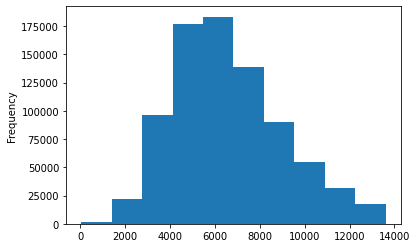

In [16]:
data_cleaner_train.dataframe["Sales"].plot(kind="hist")

In [17]:
data_cleaner_train.scale_dataframe()

In [18]:
scaled_df_train = data_cleaner_train.dataframe

In [19]:
scaled_df_train

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,-1.723137,0.848235,-0.546063,-0.535808,0.0,1.137629,2.049443,-0.541901,0.948218,0.683667,-1.013415,-0.766266,-1.013415
1,-1.720041,0.848235,-0.215209,-0.306968,0.0,1.137629,2.049443,-0.631367,1.414336,0.682599,0.986762,0.082140,0.985015
2,-1.716946,0.848235,0.714155,0.333785,0.0,1.137629,2.049443,1.101715,1.647395,0.681531,0.986762,0.147402,0.986009
3,-1.710755,0.848235,-0.728218,-0.522732,0.0,1.137629,2.049443,3.118531,-0.217078,0.691144,-1.013415,-0.766266,-1.013415
4,-1.707660,0.848235,-0.385799,-0.424657,0.0,1.137629,2.049443,-0.664597,1.647395,0.689008,-1.013415,-0.766266,-1.013415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813564,0.384777,-0.901732,-1.325903,-0.499848,0.0,-0.879021,2.049443,-0.685046,0.948218,0.681531,-1.013415,-0.766266,-1.013415
813565,0.542639,-0.901732,1.726543,5.420577,0.0,-0.879021,2.049443,-0.594302,1.181277,0.674054,-1.013415,-0.766266,-1.013415
813566,0.654070,-0.901732,-0.640239,1.729710,0.0,-0.879021,2.049443,-0.596858,-1.149315,-1.461092,0.986762,2.366310,0.987003
813567,1.208133,-0.901732,-0.864938,1.046459,0.0,-0.879021,2.049443,-0.521451,-1.149315,-1.461092,-1.013415,-0.766266,-1.013415


In [20]:
X = scaled_df_train
y = scaled_df_train.drop(columns=["Sales"], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [95]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=16, n_jobs=-1)

In [96]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=10, n_jobs=-1)

In [97]:
y_pred = regressor.predict(X_test)

In [98]:
score = regressor.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9972055336551344


In [99]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.0033077253142883615
RMSE:  0.0016538626571441807


In [100]:
model_timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_file_path = os.path.join(pwd, os.pardir, 'models')

In [102]:
dump(filename=f'{model_file_path}/{model_timestamp}.pkl', value=regressor, compress=9)

['c:\\Users\\user\\Desktop\\10_Academy\\Week_3\\Technical\\Pharmaceutical-Sales\\notebooks\\..\\models/2022-05-28-12-46-33.pkl']

In [107]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": regressor.feature_importances_})

In [108]:
feature_importance

,Feature,Importance
0,Store,0.090681
1,DayOfWeek,0.081748
2,Sales,0.000624
3,Customers,0.079295
4,Open,0.000000
5,Promo,0.101834
6,SchoolHoliday,0.093771
7,CompetitionDistance,0.090334
8,CompetitionOpenSinceMonth,0.136575
9,CompetitionOpenSinceYear,0.044172


In [115]:
plt.style.use('seaborn')

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

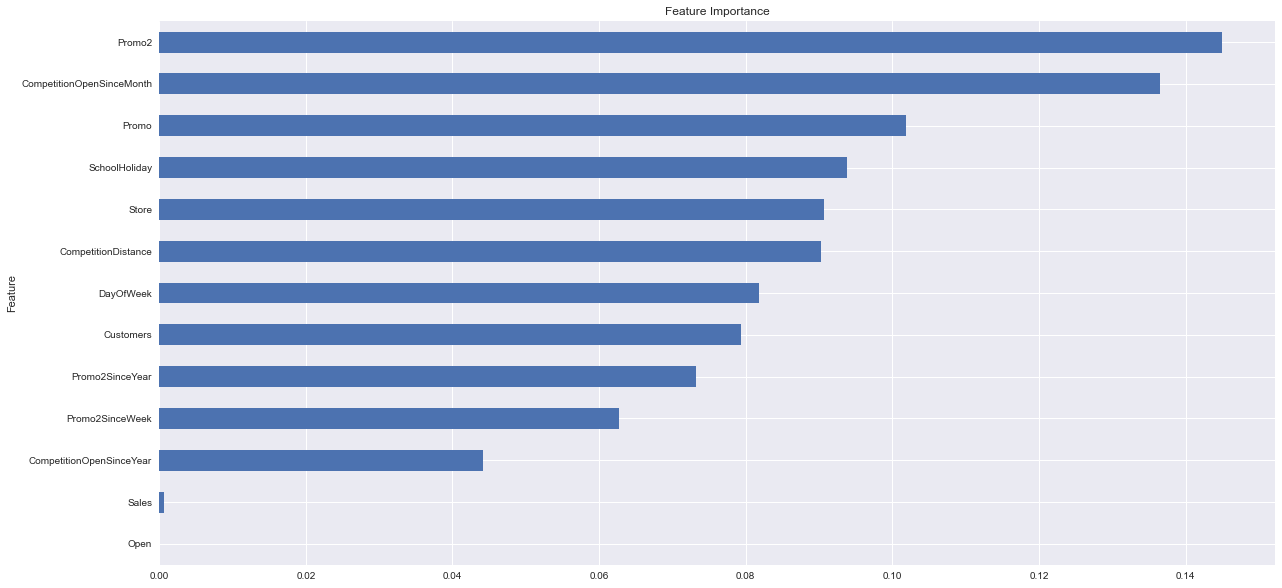

In [126]:
feature_importance.sort_values(by="Importance").plot(kind="barh", x="Feature", y="Importance", title="Feature Importance", legend=False, figsize=(20, 10))